In [1]:
# VISUALIZATION

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}") , 
print(f"matplotlib=={matplotlib.__version__}")

numpy==1.26.4
pandas==2.1.4
matplotlib==3.8.0


In [4]:
df = pd.read_csv("df_trans.csv")

In [5]:
print(df["artist_genres"].value_counts().head(10))

artist_genres
['country']                                        24
['k-pop']                                          20
['flamenco pop', 'flamenco', 'flamenco urbano']     8
['soft pop']                                        7
['art pop', 'pop']                                  5
['tropical house']                                  5
['rap']                                             5
['pop']                                             4
['edm', 'dance']                                    4
['stutter house']                                   3
Name: count, dtype: int64


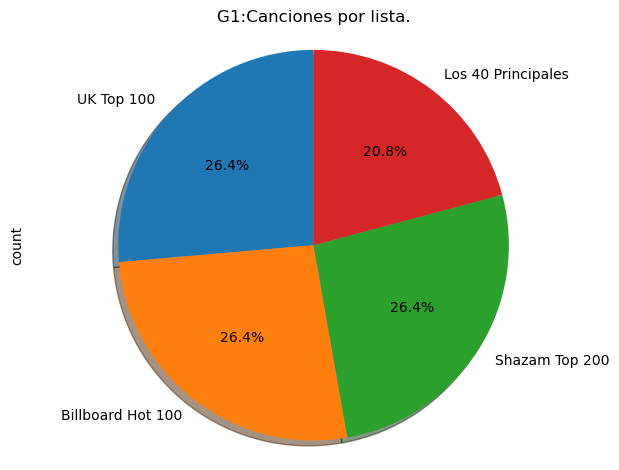

In [6]:
# Canciones por lista

clase_n=df["list"].value_counts()

clase_n.plot.pie(y=df.index,
           shadow=True,
           startangle=90,
           autopct='%1.1f%%')
plt.title("G1:Canciones por lista.")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [7]:
# Artistas más populares

top_artistas = df.groupby("artist_name")["artist_popularity"].mean().sort_values(ascending=False).head(10)


artist_name
Bad Bunny         100.0
Drake              99.0
The Weeknd         97.0
Justin Bieber      96.0
Morgan Wallen      95.0
Billie Eilish      95.0
Travis Scott       95.0
Kendrick Lamar     94.0
KAROL G            94.0
Fuerza Regida      94.0
Name: artist_popularity, dtype: float64


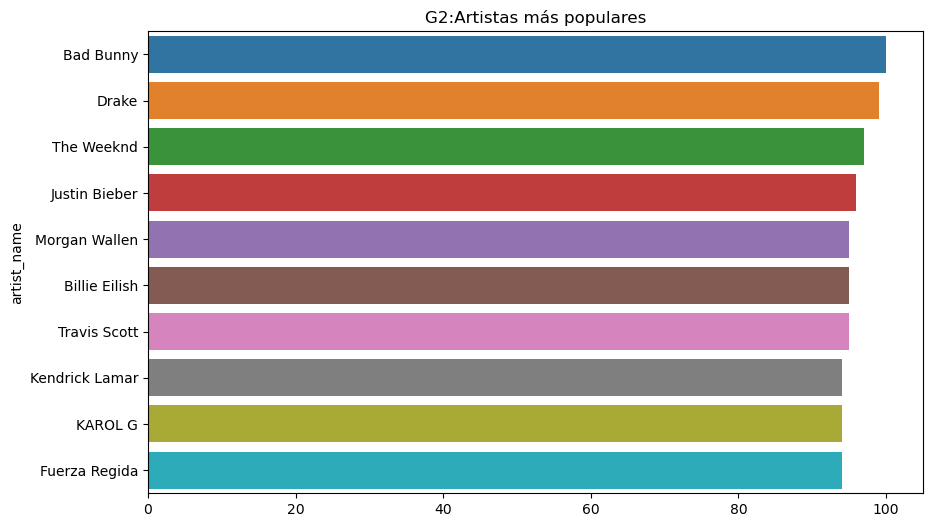

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artistas.values, y=top_artistas.index)
plt.title("G2:Artistas más populares")
plt.show()

Text(0.5, 1.0, 'G3:Artistas más populares')

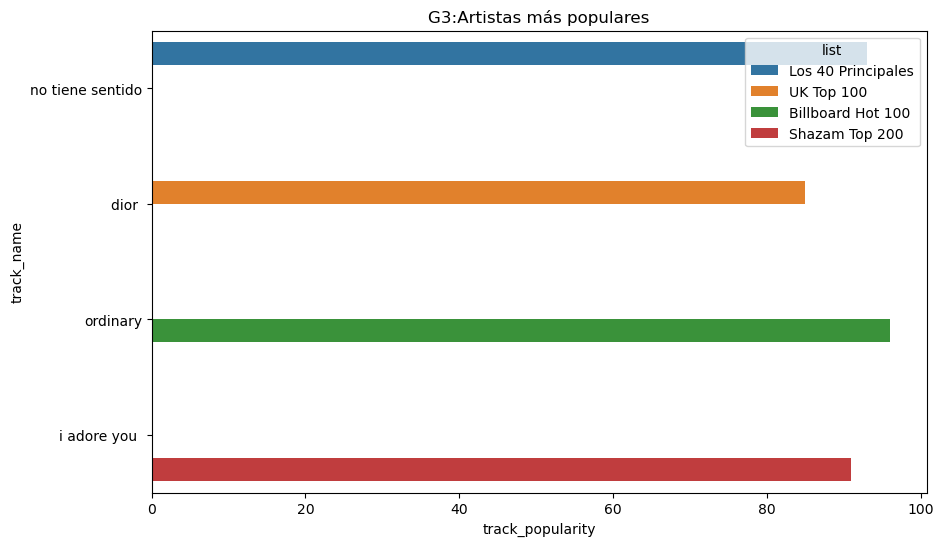

In [36]:
# CANCIONES POR LISTA

top_1=df[df["top"] == 1]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_1['track_popularity'], y=top_1["track_name"], hue=top_1['list'])
plt.title("G3:Artistas más populares")

/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


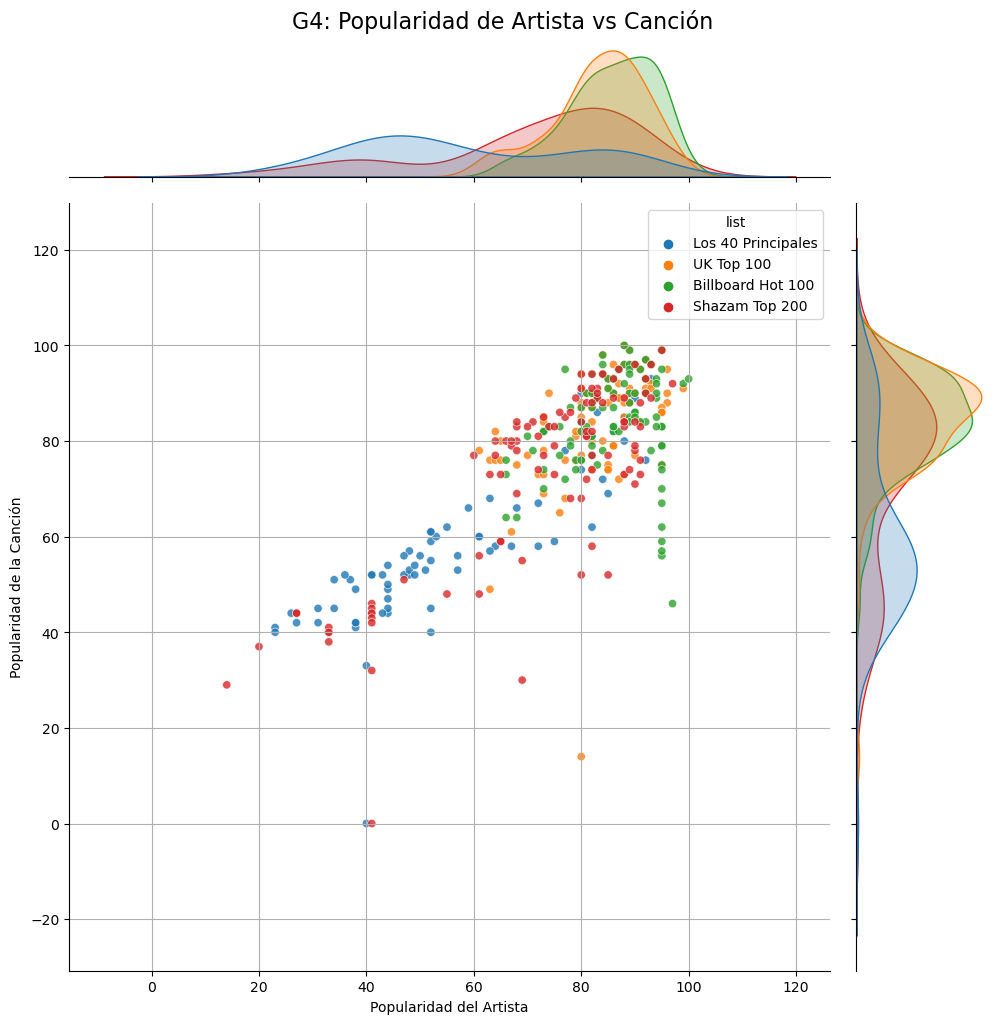

In [48]:
# Popularidad del artista vs. Popularidad de la canción

g=sns.jointplot(data=df, x="artist_popularity", y="track_popularity", hue="list", alpha=0.8, height=10) 
g.figure.suptitle("G4: Popularidad de Artista vs Canción", y=1.02, fontsize=16)
plt.xlabel("Popularidad del Artista")
plt.ylabel("Popularidad de la Canción")
plt.grid(True)
plt.show()

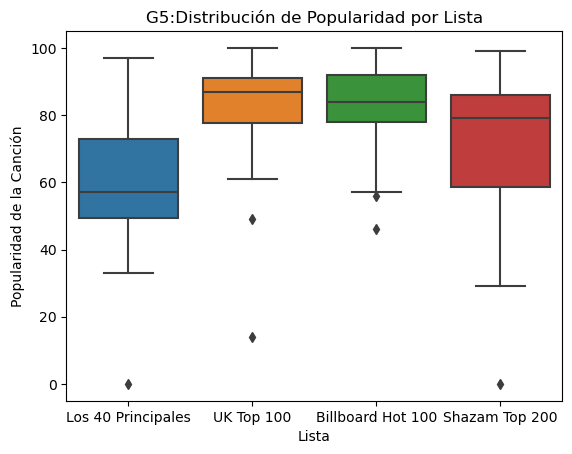

In [10]:
# Distribución De Popularidad Por Lista

sns.boxplot(x='list', y='track_popularity', data=df)

plt.title("G5:Distribución de Popularidad por Lista")
plt.ylabel("Popularidad de la Canción")
plt.xlabel("Lista")

plt.show()

/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


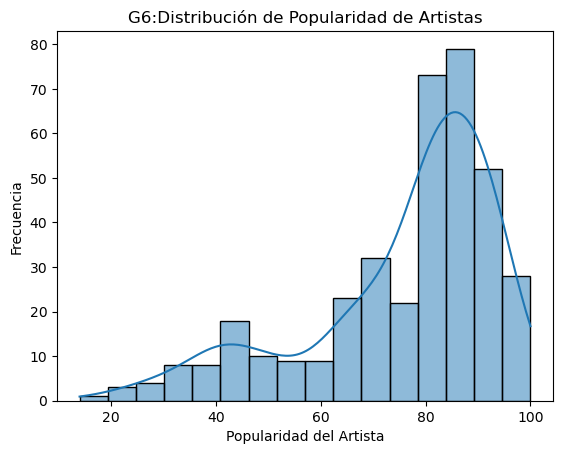

In [16]:
# Distribución De Popularidad De Artistas

sns.histplot(df["artist_popularity"], kde = True)
plt.title('G6:Distribución de Popularidad de Artistas')
plt.xlabel('Popularidad del Artista')
plt.ylabel('Frecuencia')

plt.show()

In [33]:
# Popularidad por artista por Pais

subset_40=df[df["list"].isin(["Los 40 Principales"])]
subset_BB=df[df["list"].isin(["Billboard Hot 100"])]
subset_Sz=df[df["list"].isin(["Shazam Top 200"])]
subset_UK=df[df["list"].isin(["UK Top 100"])]

/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/elba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

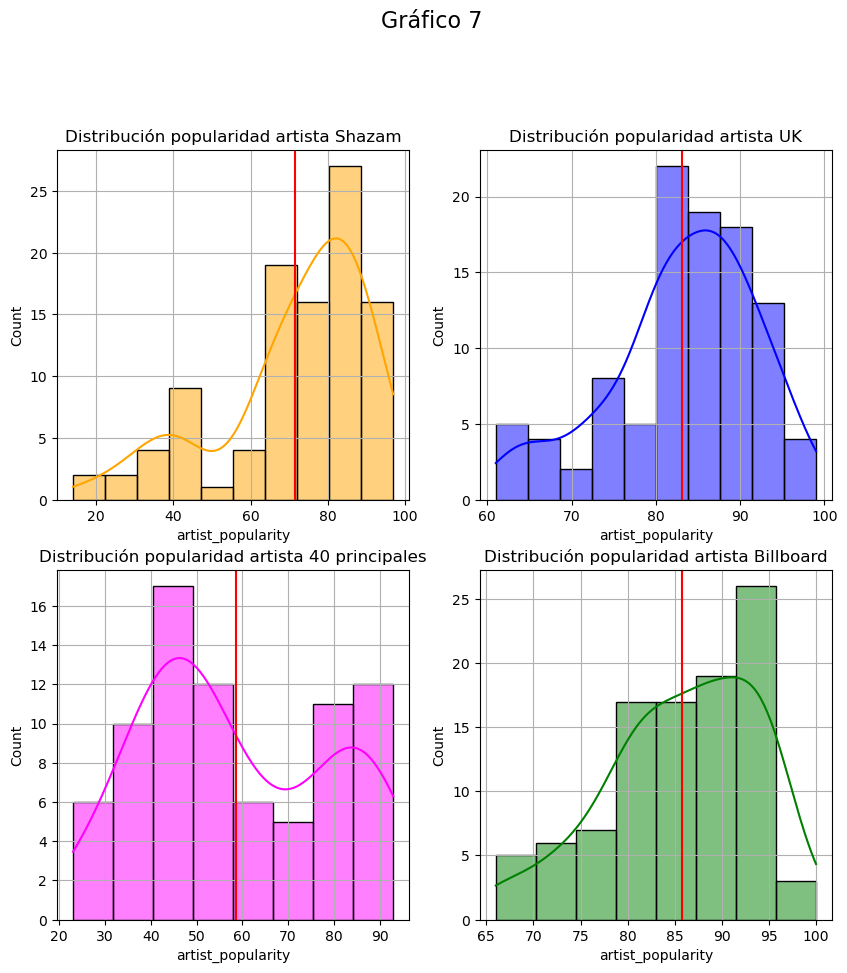

In [34]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
plt.suptitle("Gráfico 7", fontsize=16, y=1.02)

plt.subplot(2,2,3)
sns.histplot(subset_40['artist_popularity'], color = "magenta", kde = True)
plt.axvline(x=subset_40['artist_popularity'].mean(), color='red')
plt.title("Distribución popularidad artista 40 principales")
plt.grid()

plt.subplot(2,2,4)
sns.histplot(subset_BB['artist_popularity'], color = "green", kde = True)
plt.axvline(x=subset_BB['artist_popularity'].mean(), color='red')
plt.title("Distribución popularidad artista Billboard")
plt.grid()

plt.subplot(2,2,1)
sns.histplot(subset_Sz['artist_popularity'], color = "orange", kde = True)
plt.axvline(x=subset_Sz['artist_popularity'].mean(), color='red')
plt.title("Distribución popularidad artista Shazam")
plt.grid()

plt.subplot(2,2,2)
sns.histplot(subset_UK['artist_popularity'], color = "blue", kde = True)
plt.axvline(x=subset_UK['artist_popularity'].mean(), color='red')
plt.title("Distribución popularidad artista UK")
plt.grid()

plt.show()

Text(0.5, 1.0, 'G8:Porcentanjes Feats')

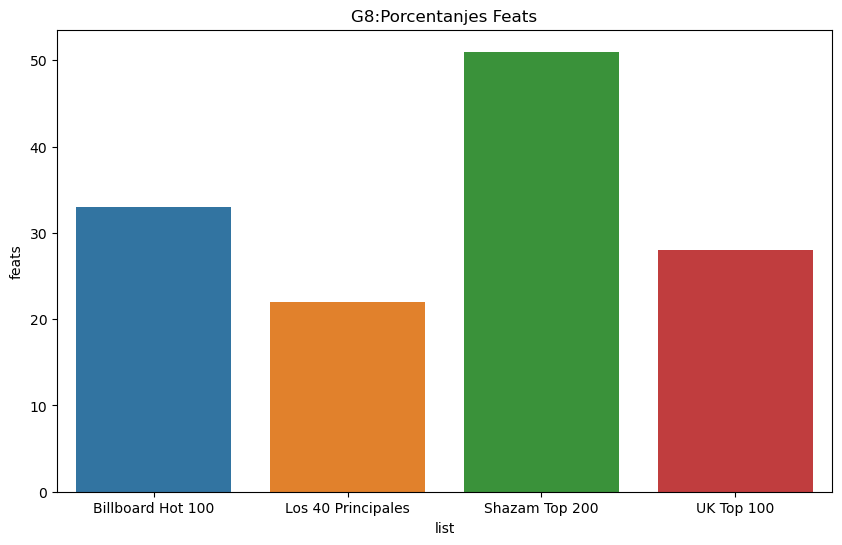

In [37]:
# Portentajes Feats
df1=df.groupby(by='list').aggregate({'feats':'count','track_name':'count'})

plt.figure(figsize=(10, 6))
sns.barplot(x=df1.index, y=df1["feats"])
plt.title("G8:Porcentanjes Feats")

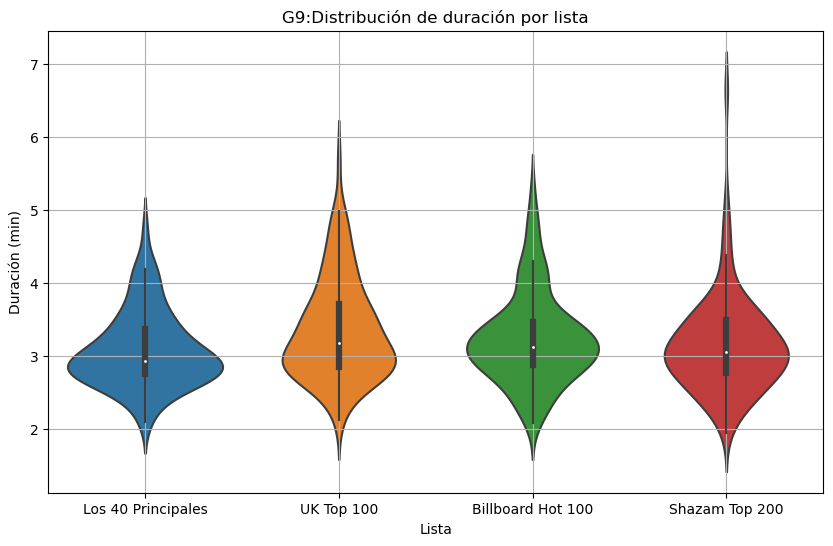

In [35]:
# Duración canciones por lista

df["duracion_min"] = df["duration_ms"] / 60000 # Pasar duración a minutos

plt.figure(figsize=(10, 6))
sns.violinplot(x="list", y="duracion_min", data=df)

plt.xlabel("Lista")
plt.ylabel("Duración (min)")
plt.title("G9:Distribución de duración por lista")
plt.grid(True)
plt.show()

(532, 16)


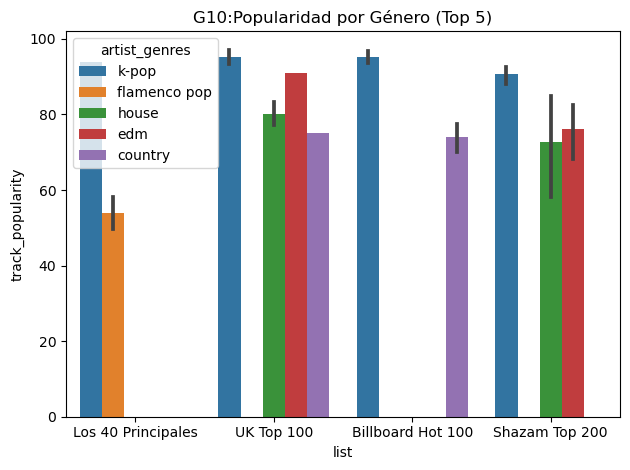

In [40]:
# Generos más populares

#Cargar CSV
df_exp = pd.read_csv("genres_exploded.csv")
print(df_exp.shape)
df_exp.head()

# Obtener los 5 géneros más frecuentes
greatest_g = df_exp["artist_genres"].value_counts().head(5)

# Filtrar solo esos géneros
df_top_genres = df_exp[df_exp["artist_genres"].isin(greatest_g.index)]

# Crear el gráfico
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_top_genres, x="list", y="track_popularity", hue="artist_genres")
plt.title("G10:Popularidad por Género (Top 5)")

plt.tight_layout()
plt.show()

In [23]:
# Genero más representado por pais
genres_40=df_exp[df_exp["list"].isin(["Los 40 Principales"])]
genres_BB=df_exp[df_exp["list"].isin(["Billboard Hot 100"])]
genres_Sz=df_exp[df_exp["list"].isin(["Shazam Top 200"])]
genres_UK=df_exp[df_exp["list"].isin(["UK Top 100"])]

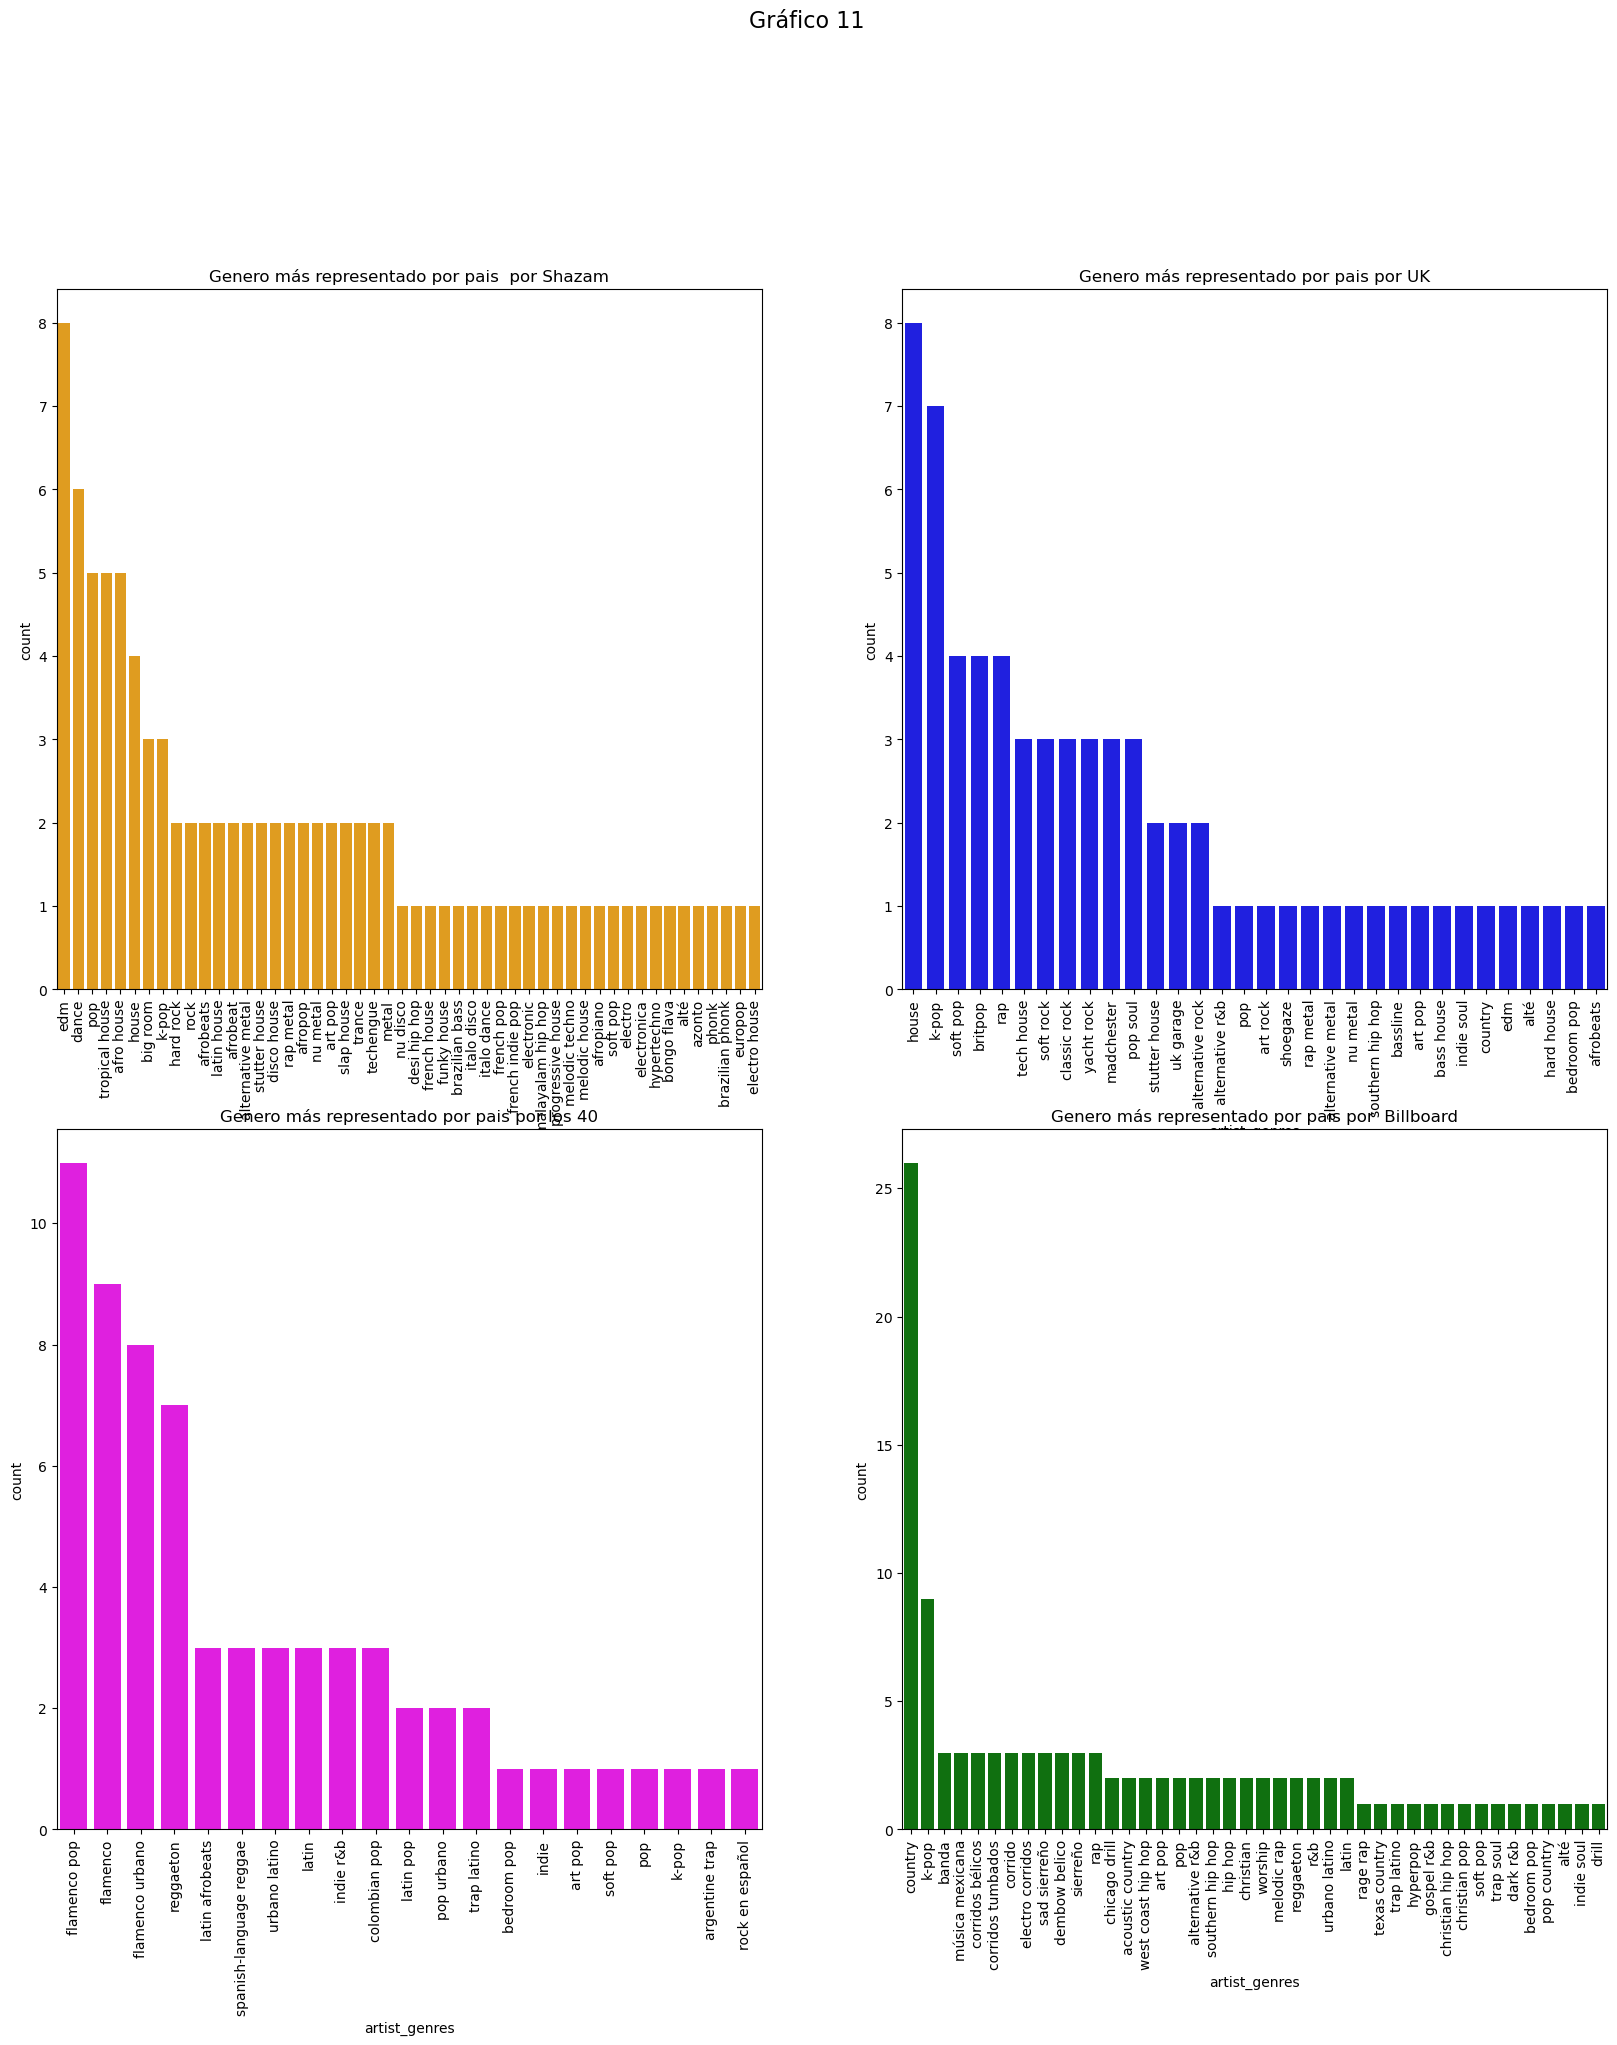

In [49]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
plt.suptitle("Gráfico 11", fontsize=16, y=1.02)

plt.subplot(2,2,3)
sns.countplot(data=genres_40, x="artist_genres",color="magenta", order=genres_40["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Genero más representado por pais por los 40")

plt.subplot(2,2,4)
sns.countplot(data=genres_BB, x="artist_genres",color = "green", order=genres_BB["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Genero más representado por pais por  Billboard")

plt.subplot(2,2,1)
sns.countplot(data=genres_Sz, x="artist_genres",color = "orange", order=genres_Sz["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Genero más representado por pais  por Shazam") 

plt.subplot(2,2,2)
sns.countplot(data=genres_UK, x="artist_genres",color = "blue", order=genres_UK["artist_genres"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Genero más representado por pais por UK")

plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'apt.'),
  Text(1, 0, 'that’s so true'),
  Text(2, 0, 'die with a smile'),
  Text(3, 0, 'messy'),
  Text(4, 0, 'ordinary'),
  Text(5, 0, 'azizam'),
  Text(6, 0, 'lose control'),
  Text(7, 0, 'birds of a feather'),
  Text(8, 0, 'espresso'),
  Text(9, 0, 'manchild')])

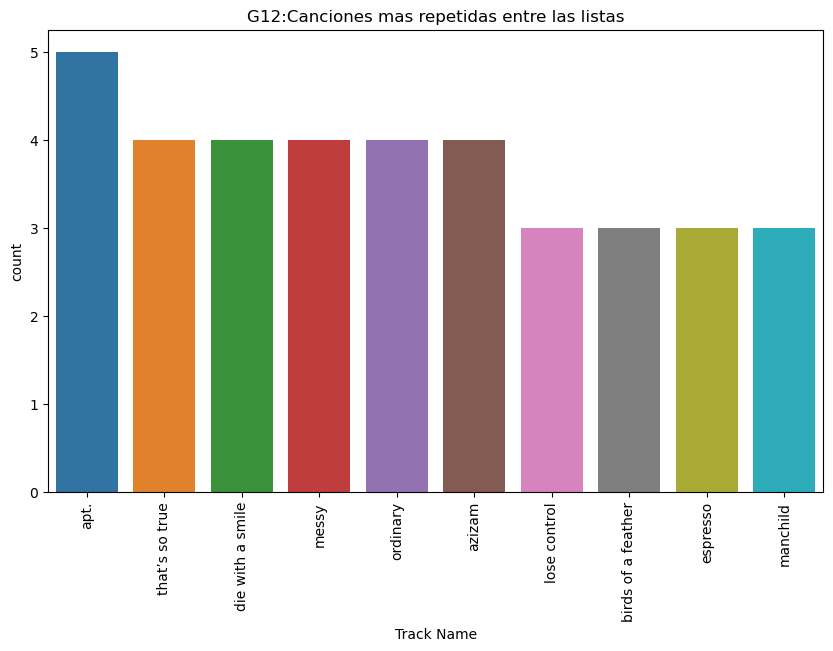

In [50]:
# Canciones más repetidas entre las listas
plt.figure(figsize=(10, 6))
sns.countplot(x="track_name", data=df, order=df["track_name"].value_counts().index[:10])
plt.title("G12:Canciones mas repetidas entre las listas")
plt.xlabel("Track Name")
plt.xticks(rotation=90)

In [26]:
# ARTISTAS MAS REPETIDOS POR LISTAS

Text(0.5, 1.0, 'G13:Artistas más repetidos teniendo en cuenta los feats')

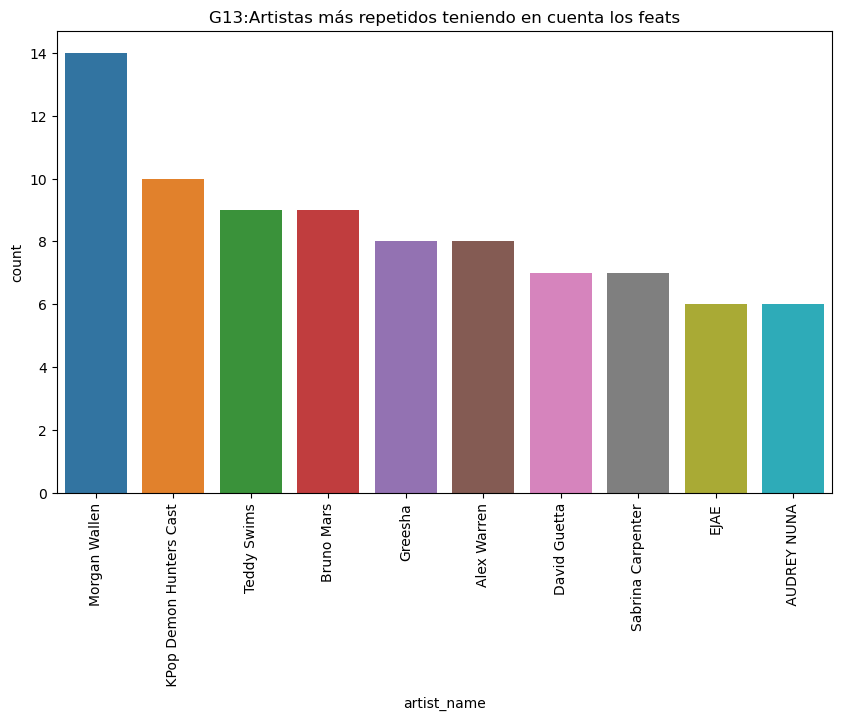

In [51]:
artistas=[]
for i in df['artist_name']:
    artistas.append(i)
for i in df[df['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas.append(i)
    
plt.figure(figsize=(10, 6))
df_artistas=pd.DataFrame()
df_artistas["artist_name"]=artistas
sns.countplot(data=df_artistas, x="artist_name", order=df_artistas["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("G13:Artistas más repetidos teniendo en cuenta los feats")

In [28]:
# ARTISTAS MÁS REPETIDOS SEGÚN LAS COLABORACIONES POR PAIS

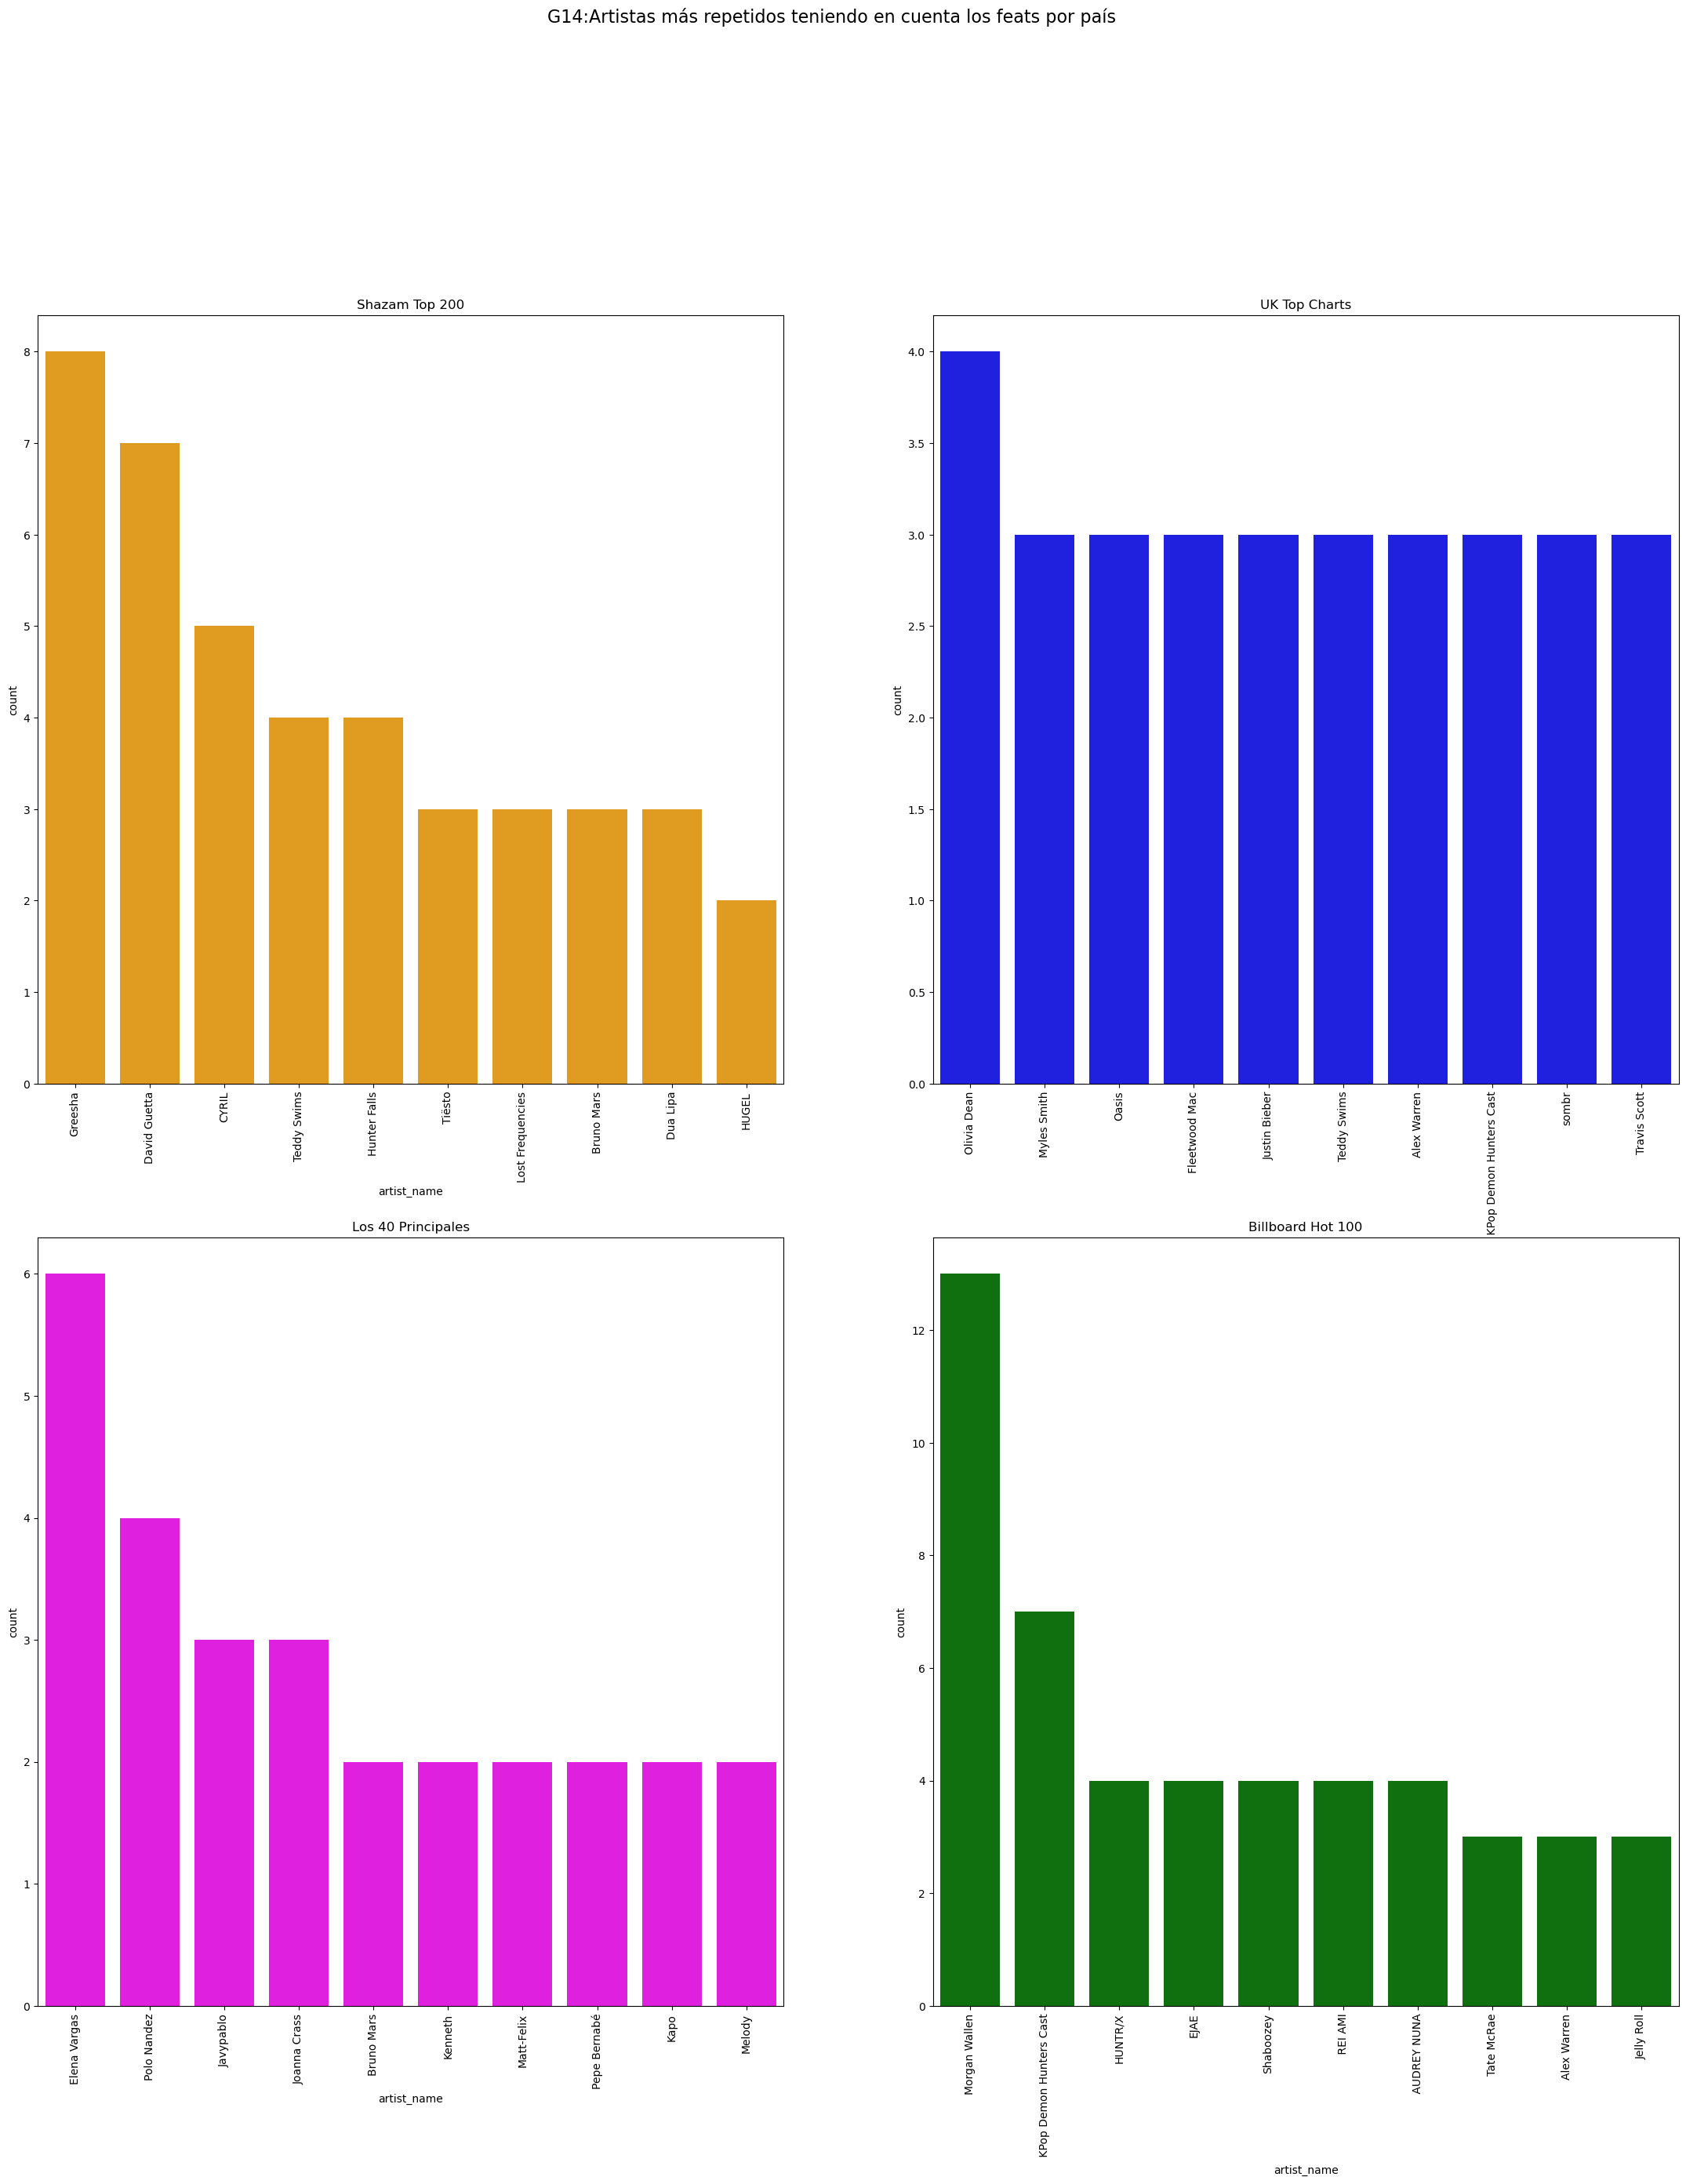

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (27, 28))
plt.suptitle("G14:Artistas más repetidos teniendo en cuenta los feats por país", fontsize=16, y=1.02) 

plt.subplot(2,2,3)
artistas_40=[]
for i in subset_40['artist_name']:
    artistas_40.append(i)
for i in subset_40[subset_40['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_40.append(i)

df_artistas_40=pd.DataFrame()
df_artistas_40["artist_name"]=artistas_40
sns.countplot(data=df_artistas_40, x="artist_name", color="magenta", order=df_artistas_40["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Los 40 Principales")

plt.subplot(2,2,4)
artistas_BB=[]
for i in subset_BB['artist_name']:
    artistas_BB.append(i)
for i in subset_BB[subset_BB['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_BB.append(i)

df_artistas_BB=pd.DataFrame()
df_artistas_BB["artist_name"]=artistas_BB
sns.countplot(data=df_artistas_BB, x="artist_name", color="green", order=df_artistas_BB["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Billboard Hot 100")

plt.subplot(2,2,1)
artistas_Sz=[]
for i in subset_Sz['artist_name']:
    artistas_Sz.append(i)
for i in subset_Sz[subset_Sz['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_Sz.append(i)

df_artistas_Sz=pd.DataFrame()
df_artistas_Sz["artist_name"]=artistas_Sz
sns.countplot(data=df_artistas_Sz, x="artist_name", color="orange", order=df_artistas_Sz["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Shazam Top 200")

plt.subplot(2,2,2)
artistas_UK=[]
for i in subset_UK['artist_name']:
    artistas_UK.append(i)
for i in subset_UK[subset_UK['feats'].notna()]['feats'].apply(lambda x: x.split(',')).explode():
    artistas_UK.append(i)

df_artistas_UK=pd.DataFrame()
df_artistas_UK["artist_name"]=artistas_UK
sns.countplot(data=df_artistas_UK, x="artist_name", color="blue", order=df_artistas_UK["artist_name"].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("UK Top Charts")

plt.show()